The internet has more resources about SVMs than you can read in a lifetime.
I recommend [this](https://www.youtube.com/watch?v=eHsErlPJWUU) and [this](https://www.youtube.com/watch?v=XUj5JbQihlU&t=2940s) videos by Yaser Abu-Mostafa (CalTech). [SKlearn's documentaion](http://scikit-learn.org/stable/modules/svm.html) is also very helpful. [This is a nice interactive demo](https://cs.stanford.edu/people/karpathy/svmjs/demo/) from Karpathy, and [this](https://blog.statsbot.co/support-vector-machines-tutorial-c1618e635e93) is a nice blogpost.

<IPython.core.display.Javascript object>


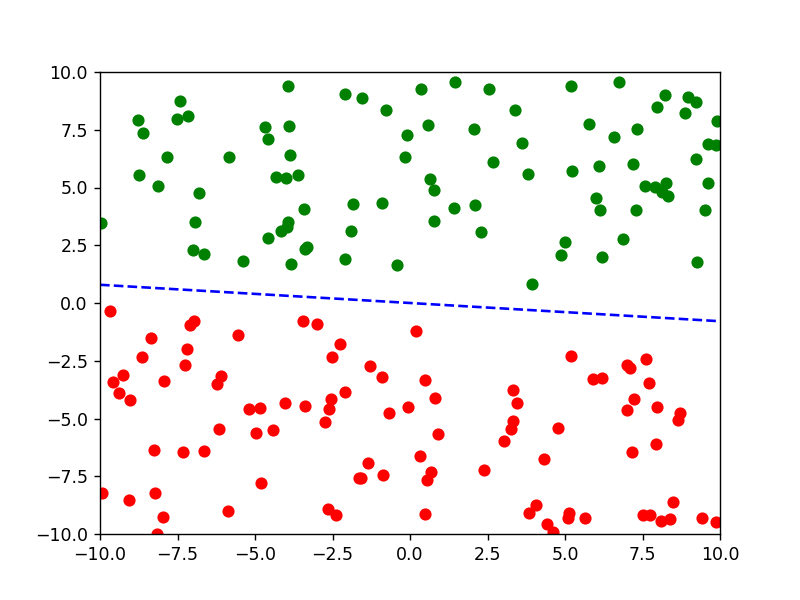

(-10, 10)

In [1]:
%matplotlib notebook
from __future__ import division
import numpy as np
import os,sys,pprint,path
from sklearn.svm import SVC
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.cm as cm

np.random.seed(21)

N=200
ps=np.random.uniform(low=-10,high=10,size=[N,2]) # generate N points
alpha=np.random.uniform(low=0,high=2*np.pi)      # generate random direction
b=np.array([np.cos(alpha), np.sin(alpha)])       
ps=ps[np.abs(np.matmul(ps,b))>1] # Delete points whose distance to boundary is < than 1
ix_a=np.dot(ps,b)>0              # indices of one label
ix_b=np.dot(ps,b)<0              # indices of other label
plt.figure()
X=np.linspace(-10,10)
plt.plot(ps[ix_a,0],ps[ix_a,1],'or')
plt.plot(ps[ix_b,0],ps[ix_b,1],'og')
plt.plot(X,-X*b[0]/b[1],'--b')
plt.gca().set_xlim([-10,10])
plt.gca().set_ylim([-10,10])

<IPython.core.display.Javascript object>


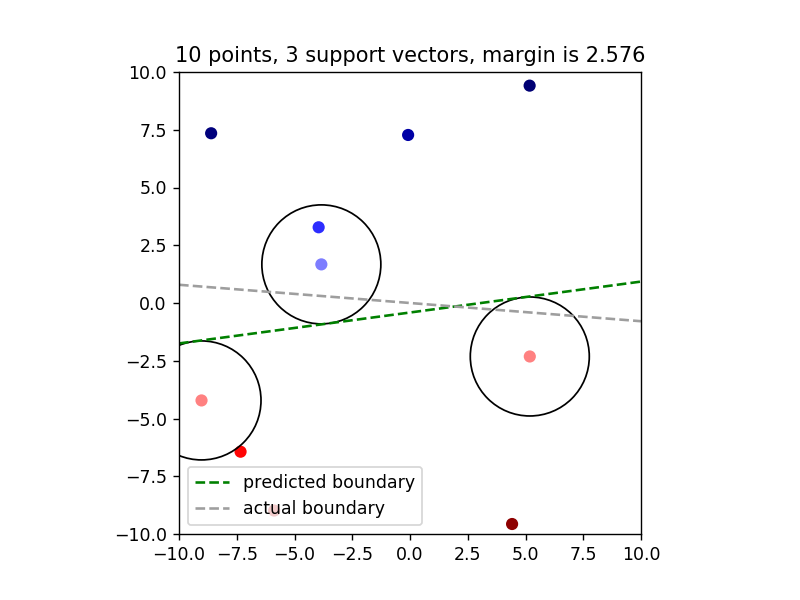

<IPython.core.display.Javascript object>


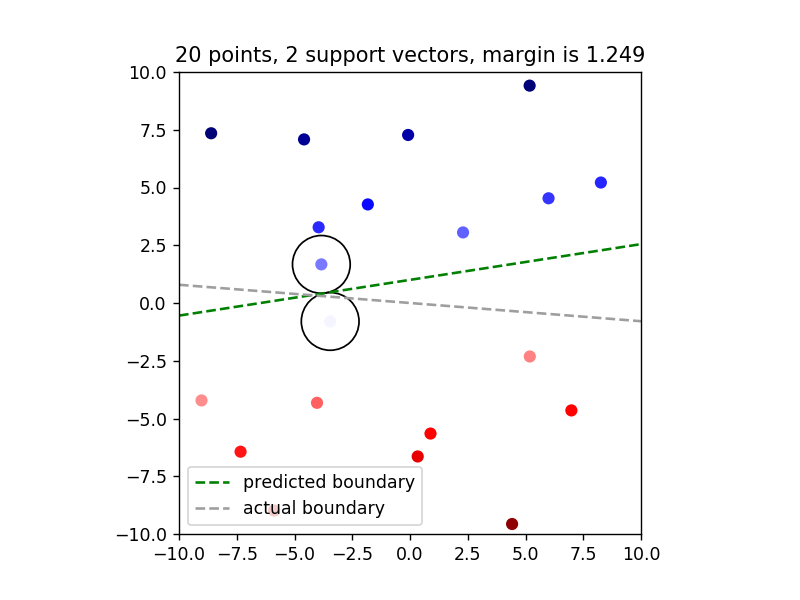

<IPython.core.display.Javascript object>


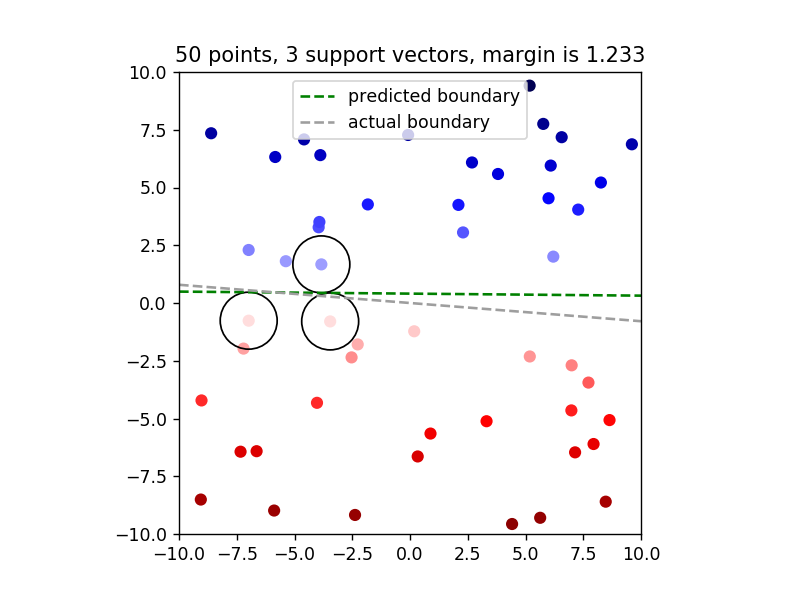

<IPython.core.display.Javascript object>


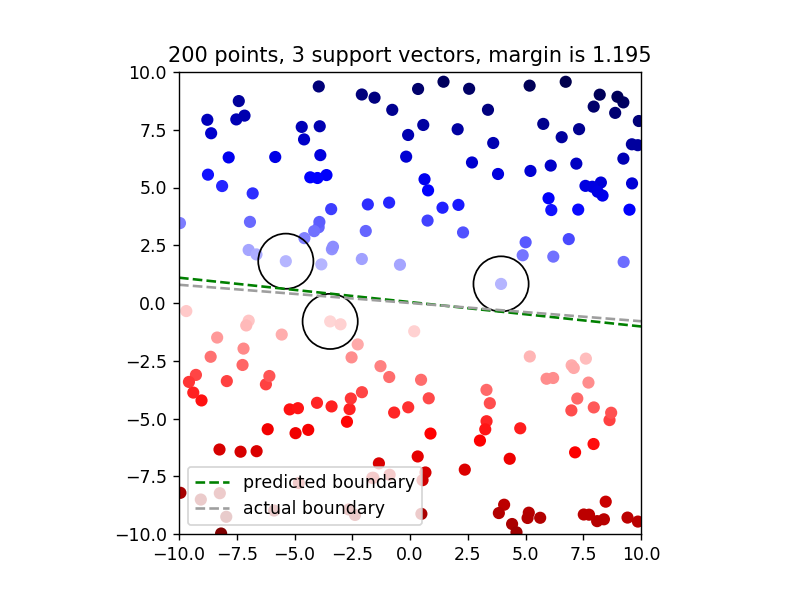

In [2]:
svc=SVC(kernel='linear',C=1e10) #(very high C, effectively infinity, aiming for exact separability)
w=0
def partial_fit(n): #fits the classifier on the first n points
    svc.fit(ps[:n], ix_a[:n])   
    distance=svc.decision_function(ps)
    scaled_distance=(distance-min(distance))/(max(distance)-min(distance))
    f,ax=plt.subplots(1,1)
    plt.scatter(ps[:n,0],ps[:n,1],c=cm.seismic(scaled_distance)) #color points according to their predicted distance
    w = svc.coef_[0]
    a = -w[0] / w[1]
    ax.plot(X, -(w[0]*X + svc.intercept_[0])/ w[1],'--g',label='predicted boundary')
    ax.plot(X,-X*b[0]/b[1],'--',color=[0.62,0.62,0.62],label='actual boundary')
    #import pdb; pdb.set_trace()
    margin=1/np.linalg.norm(w)
    for sv in svc.support_vectors_:
        ax.add_artist(plt.Circle(sv, margin, fc='none', ec='k'))
    ax.set_xlim([-10,10])
    ax.set_ylim([-10,10])
    ax.set_ylim([-10,10])
    ax.legend()
    ax.set_title('%d points, %d support vectors, margin is %1.3f' % (n,len(svc.support_vectors_), margin))
    ax.set_aspect('equal')
    
for n in [10,20,50,200]:
    partial_fit(n)


Something to think about: Note that with 50 points we have 6 support vectors and when we quadruple the number data poitns to 200 we end up with 9. How much information did we gain from quadrupling the sample?

While you think, let's generate data that is not linearly separable:

<IPython.core.display.Javascript object>


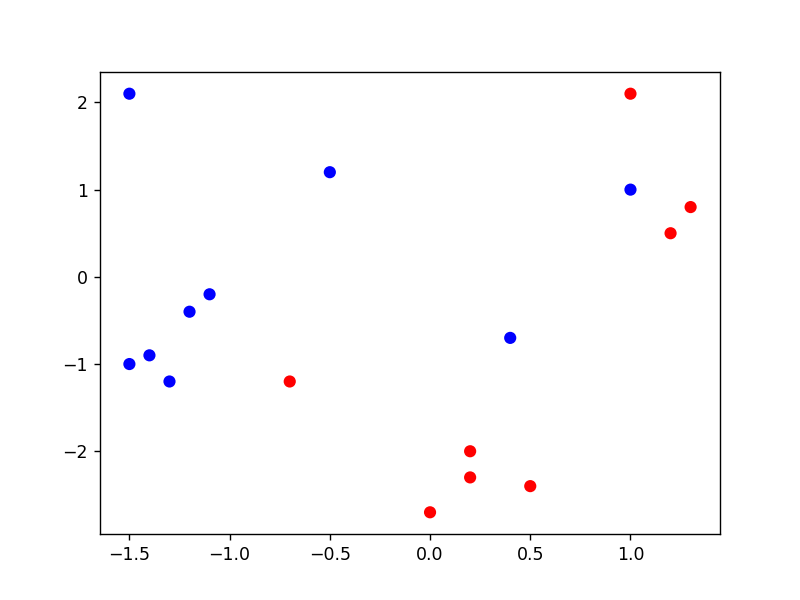

In [3]:
ps=np.array([[ 0.4, -1.5, -1.4, -1.3, -1.1, -1.2, -0.5, -1.5,  1. ,  1.3,  1.2, 0.2,  0.5,  0.2,  0. ,  1., -0.7],
       [-0.7, -1. , -0.9, -1.2, -0.2, -0.4,  1.2,  2.1,  1. ,  0.8,  0.5, -2. , -2.4, -2.3, -2.7,  2.1, -1.2]]).T
label= np.array([0] * 9 + [1] * 8)
plt.figure()
plt.scatter(ps[:,0],ps[:,1],c=cm.bwr(256*label))
plt.show()

Try to classify this data using RBF with a few different $\gamma$ values, polynomial kernels with different $C$ etc. and see the result. Here's a quickstart fo you, plotting the desicion bounrady and all that (adapted from [here](http://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html#sphx-glr-auto-examples-svm-plot-svm-kernels-py)):

<IPython.core.display.Javascript object>


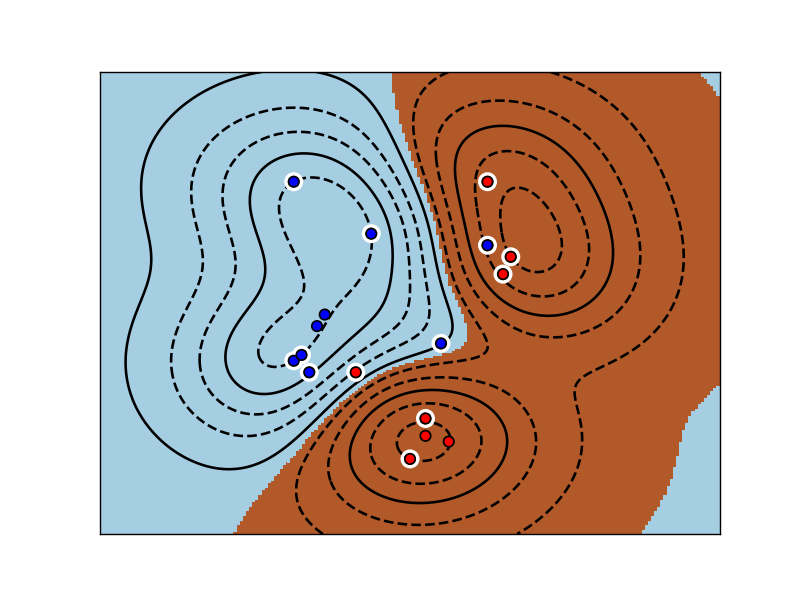

In [4]:
clf = SVC() #This chooses RBF by default
clf.fit(ps, label)

# plot the line, the points, and the nearest vectors to the plane
plt.figure()
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', zorder=10, edgecolors='w', linewidth=2)
plt.scatter(ps[:, 0], ps[:, 1], c=cm.bwr(256*label), zorder=10, cmap=plt.cm.Paired,
            edgecolors='k')

plt.axis('tight')
x_min = -4
x_max = 4
y_min = -4
y_max = 4

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=np.linspace(-1,1,10))

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())
plt.show()

# The effect of C in linear SVM

<IPython.core.display.Javascript object>


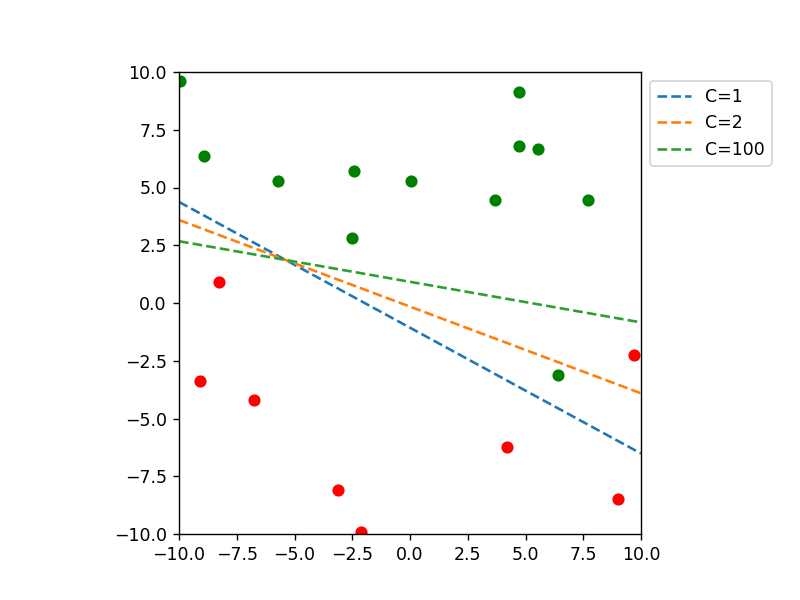

<IPython.core.display.Javascript object>


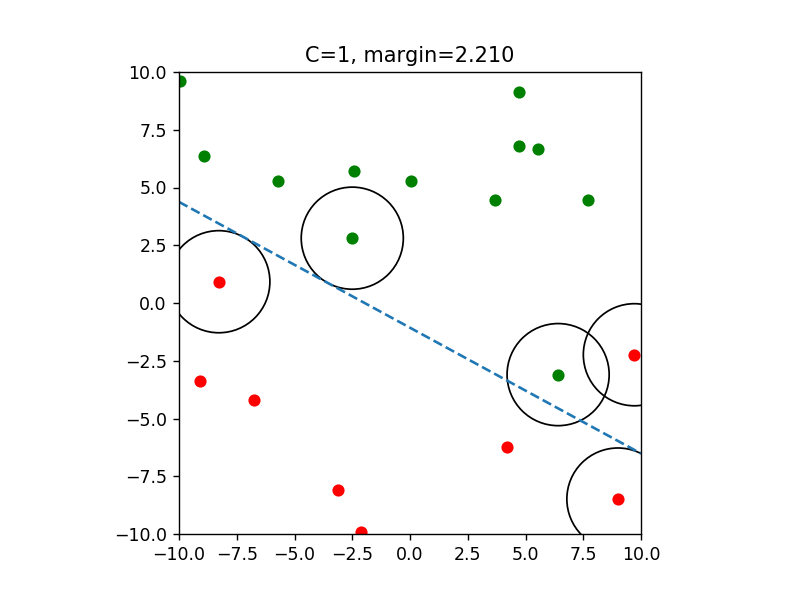

<IPython.core.display.Javascript object>


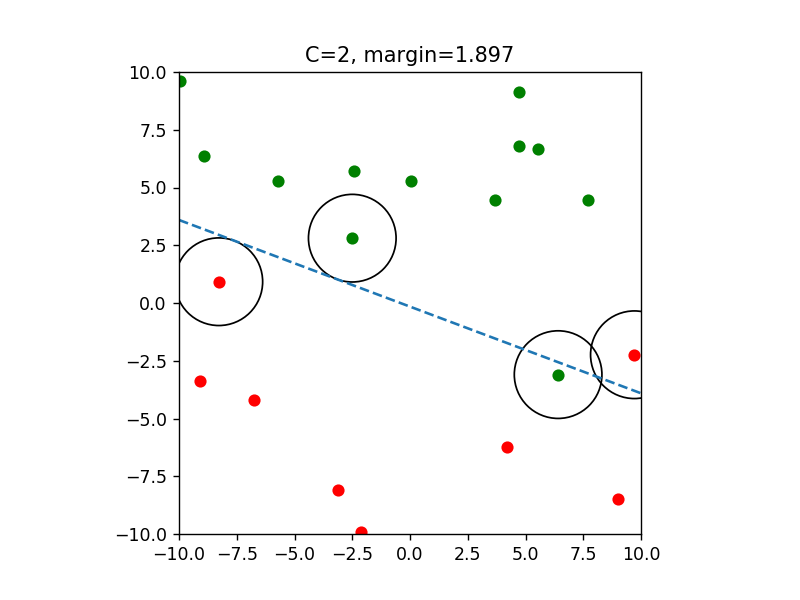

<IPython.core.display.Javascript object>


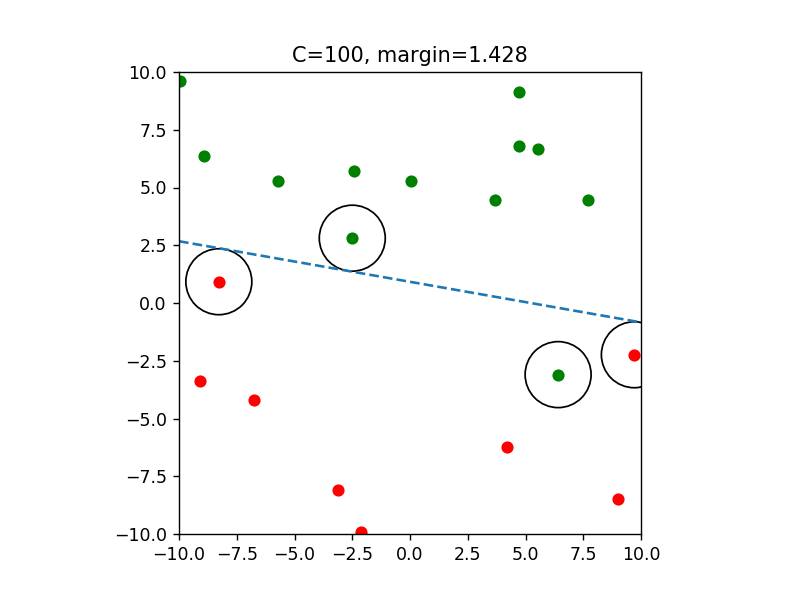

In [5]:
N=20
np.random.seed(112)
ps=np.random.uniform(low=-10,high=10,size=[N,2])
alpha=np.random.uniform(low=0,high=2*np.pi)
b=np.array([np.cos(alpha), np.sin(alpha)])
plt.figure()
X=np.linspace(-10,10)
ix=ps[:,1]>0;#np.sum(ps,axis=1)>0
for i in xrange(N):
    p=np.exp(-0.1*ps[i,1]**2)
    if np.random.rand()>p:
        ix[i]=np.logical_not(ix[i])
nix=np.logical_not(ix)
plt.plot(ps[ix,0],ps[ix,1],'or')
plt.plot(ps[nix,0],ps[nix,1],'og')

for C in [1,2,100]:
    svc=SVC(kernel='linear',C=C)
    svc.fit(ps, ix)   
    w = svc.coef_[0]
    a = -w[0] / w[1]
    plt.plot(X, a * X - (svc.intercept_[0]) / w[1],'--',label='C=%d'%C)
plt.gca().set_xlim([-10,10])
plt.gca().set_ylim([-10,10])
plt.gca().set_aspect('equal')
plt.gca().legend(bbox_to_anchor=(1,1))

for C in [1,2,100]:
    svc=SVC(kernel='linear',C=C)
    svc.fit(ps, ix)   
    w = svc.coef_[0]
    a = -w[0] / w[1]
    margin=1/np.linalg.norm(w)
    
    f,ax=plt.subplots(1,1)
    ax.plot(ps[ix,0],ps[ix,1],'or')
    ax.plot(ps[nix,0],ps[nix,1],'og')
    ax.plot(X, a * X - (svc.intercept_[0]) / w[1],'--')
    for sv in svc.support_vectors_:
        ax.add_artist(plt.Circle(sv, margin, fc='none', ec='k'))
    ax.set_title('C=%d, margin=%1.3f'% (C,margin))
    ax.set_aspect('equal')
    ax.set_xlim([-10,10])
    ax.set_ylim([-10,10])